In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

train.drop(columns=['id'], inplace=True)
test.drop(columns=['id'], inplace=True)

train.info()
train.describe()
# train.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Sex         750000 non-null  object 
 1   Age         750000 non-null  int64  
 2   Height      750000 non-null  float64
 3   Weight      750000 non-null  float64
 4   Duration    750000 non-null  float64
 5   Heart_Rate  750000 non-null  float64
 6   Body_Temp   750000 non-null  float64
 7   Calories    750000 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 45.8+ MB


,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000
mean,41.420404,174.697685,75.145668,15.421015,95.483995,40.036253,88.282781
std,15.175049,12.824496,13.982704,8.354095,9.449845,0.779875,62.395349
min,20.000000,126.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,34.000000
50%,40.000000,174.000000,74.000000,15.000000,95.000000,40.300000,77.000000
75%,52.000000,185.000000,87.000000,23.000000,103.000000,40.700000,136.000000
max,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [4]:
# eda
numerical_features = train.select_dtypes(include=np.number).columns.tolist()
categorical_features = train.select_dtypes(include='object').columns.tolist()
print(f'Numerical features: {numerical_features}')
print(f'Categorical features: {categorical_features}')

train = pd.get_dummies(train, columns = ["Sex"], drop_first=True, dtype = int) # only encodes Sex column.
train

Numerical features: ['Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp', 'Calories']
Categorical features: ['Sex']


,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,Sex_male
0,36,189.0,82.0,26.0,101.0,41.0,150.0,1
1,64,163.0,60.0,8.0,85.0,39.7,34.0,0
2,51,161.0,64.0,7.0,84.0,39.8,29.0,0
3,20,192.0,90.0,25.0,105.0,40.7,140.0,1
4,38,166.0,61.0,25.0,102.0,40.6,146.0,0
...,...,...,...,...,...,...,...,...
749995,28,193.0,97.0,30.0,114.0,40.9,230.0,1
749996,64,165.0,63.0,18.0,92.0,40.5,96.0,0
749997,60,162.0,67.0,29.0,113.0,40.9,221.0,1
749998,45,182.0,91.0,17.0,102.0,40.3,109.0,1


In [5]:
"""
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore', dtype=int)
encoded_array = ohe.fit_transform(train[categorical_features]) # returns array
encoded_df = pd.DataFrame(encoded_array, columns=ohe.get_feature_names_out(categorical_features))
train = pd.concat([train.drop(columns=categorical_features), encoded_df], axis=1)
train 
"""

"\nfrom sklearn.preprocessing import OneHotEncoder\nohe = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore', dtype=int)\nencoded_array = ohe.fit_transform(train[categorical_features]) # returns array\nencoded_df = pd.DataFrame(encoded_array, columns=ohe.get_feature_names_out(categorical_features))\ntrain = pd.concat([train.drop(columns=categorical_features), encoded_df], axis=1)\ntrain \n"

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Age         750000 non-null  int64  
 1   Height      750000 non-null  float64
 2   Weight      750000 non-null  float64
 3   Duration    750000 non-null  float64
 4   Heart_Rate  750000 non-null  float64
 5   Body_Temp   750000 non-null  float64
 6   Calories    750000 non-null  float64
 7   Sex_male    750000 non-null  int64  
dtypes: float64(6), int64(2)
memory usage: 45.8 MB


# Visualizing distribution of each column

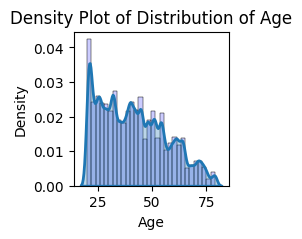

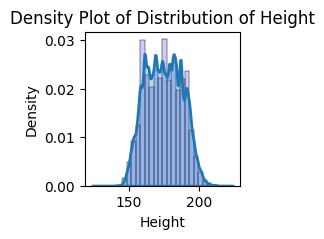

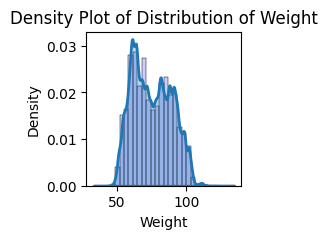

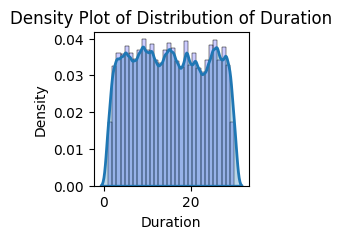

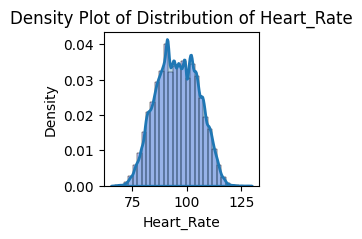

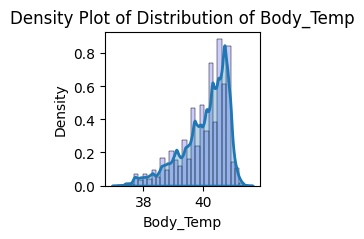

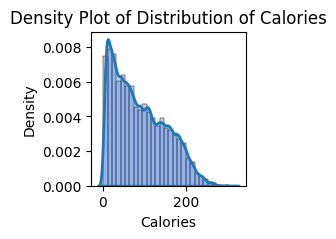

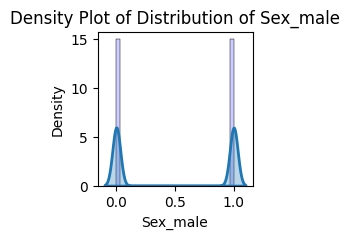

In [7]:
# Visualize distribution of each col
for cols in train.columns:
    plt.figure(figsize=(2,2))
    sns.histplot(data=train[cols], bins = 30, stat='density',color='blue', alpha = 0.2)
    # sns.histplot(data=train[cols], bins=30, kde=False, color='blue', stat='density', alpha = 0.6) 
    sns.kdeplot(data=train[cols], lw=2, fill=True, cmap="Reds", alpha = 0.3)
    plt.title(f"Density Plot of Distribution of {cols}")

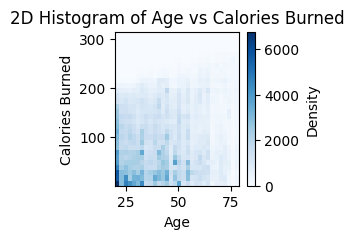

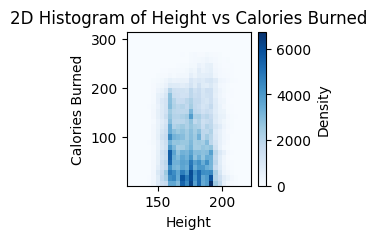

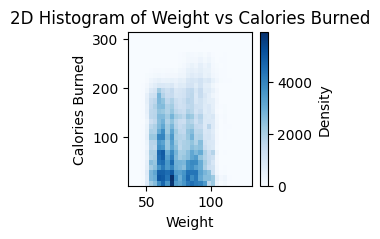

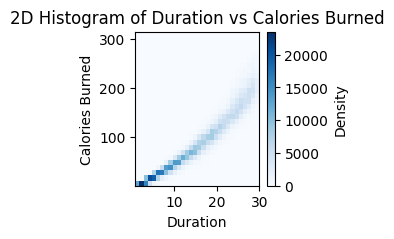

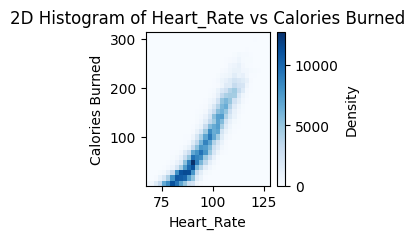

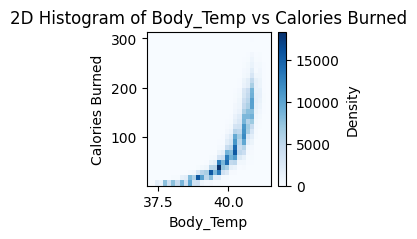

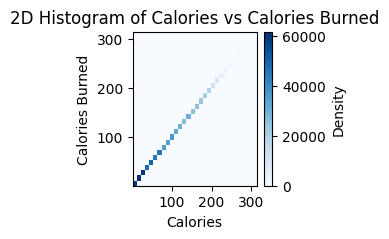

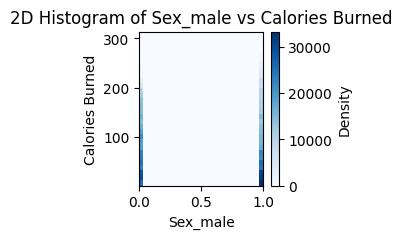

In [8]:
for cols in train.columns:
    plt.figure(figsize=(2,2))
    plt.hist2d(x=train[cols], y=train['Calories'], bins=30, cmap='Blues')
    plt.colorbar(label='Density')
    plt.title(f'2D Histogram of {cols} vs Calories Burned')
    plt.xlabel(cols)
    plt.ylabel('Calories Burned')
    plt.show()

# Visualizing correlation of each column with target variable 'Calories'

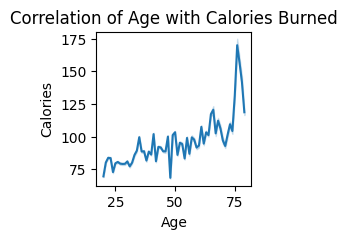

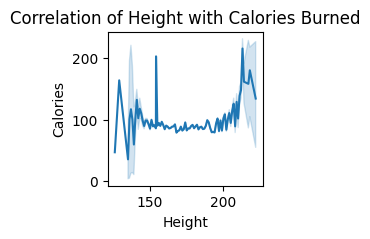

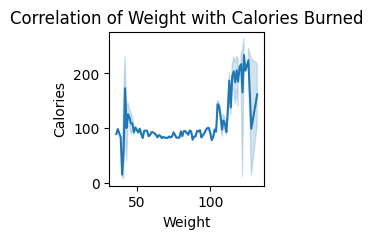

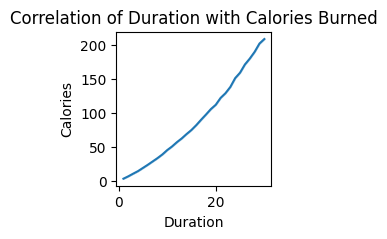

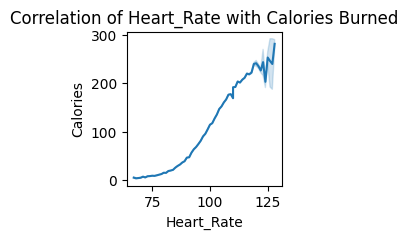

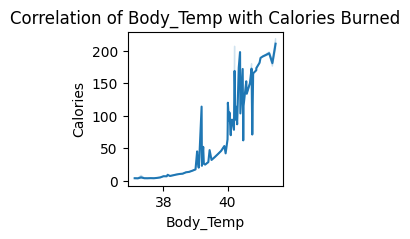

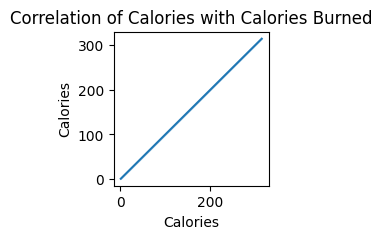

In [9]:
for cols in numerical_features:
    plt.figure(figsize=(2, 2))
    sns.lineplot(data = train, x= cols, y='Calories')
    plt.title(f'Correlation of {cols} with Calories Burned')
    plt.show()

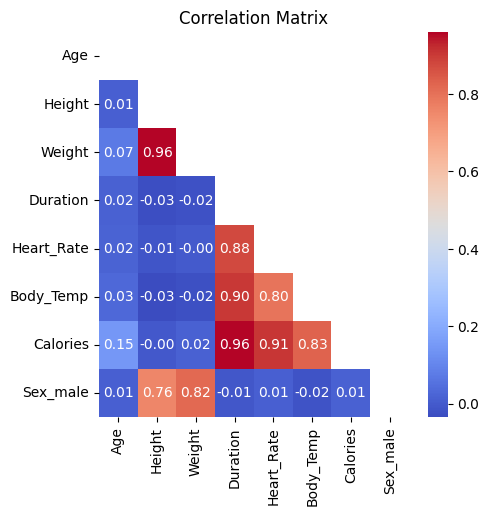

In [10]:
corr = train.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(5, 5))
sns.heatmap(corr, mask = mask ,annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Correlation 
Calories burned during exercise correlate the strongest with...
- exercise duration (pearson r = 0.96)
- Heart rate (r = 0.91)
- Body temp (r = 0.83)
- Age (r= 0.15)
- Weight (r = 0.02)


# Can we find clusters in the data?
# Kmeans Clustering with PyCaret

In [11]:
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

In [12]:
train = pd.read_csv('train.csv')
train.drop(columns=['id'], inplace=True)

In [13]:
# Suppose 'train' is your DataFrame
numerical_features = train.select_dtypes(include=np.number).columns.tolist()
categorical_features = train.select_dtypes(include='object').columns.tolist()

print("Numerical features:", numerical_features)
print("Categorical features:", categorical_features)

num_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
    ])
cat_transformer = Pipeline(steps=[
    ('ohe', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore', dtype=int))
    ])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, numerical_features),
        ('cat', cat_transformer, categorical_features)
    ])

train_processed = preprocessor.fit_transform(train)

results = []


# from sklearn.cluster import MiniBatchKMeans

for n_clusters in range(2, 12):
    print(f'Clustering with {n_clusters} clusters')
    kmeans = KMeans(n_clusters=n_clusters, random_state=42) 

    #mbk = MiniBatchKMeans(n_clusters=n_clusters, batch_size=10000, random_state=42, max_iter=50, n_init=1, verbose =1) # verbose prints iteration updates
    #labels = mbk.fit_predict(train_processed)
    #inertia = mbk.inertia_

    # max_iter is the number of iterations for a single run of KMeans to converge the moving centroids till stabilize
    # n_init is the number of times KMeans algo runs with diff random centroid seeds in each cluster, best result (lowest inertia) is kept

    labels = kmeans.fit_predict(train_processed) # gives u the cluster labels
    inertia = kmeans.inertia_ # sum of squared distances to closest cluster center
    #sil = silhouette_score(train_processed, labels) # gives u the silhouette score, higher is better (how well separated the clusters are)
    ch = calinski_harabasz_score(train_processed, labels) # higher is better, ratio of between-cluster variance to within-cluster variance
    db = davies_bouldin_score(train_processed, labels) # lower is better, average similarity betw clusters
    results.append({
        'n_clusters': n_clusters,
        'inertia': inertia,
        #'silhouette_score': sil, # silhouteete score is computationally very expensive, takes forever to run
        # sil computes pairwise distances between all points, which is O(n²) complexity.
        'Calinski-Harabasz': ch,
        'Davies-Bouldin': db
    })

results_df = pd.DataFrame(results)
print(results_df)

Numerical features: ['Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp', 'Calories']
Categorical features: ['Sex']
Clustering with 2 clusters
Clustering with 3 clusters
Clustering with 4 clusters
Clustering with 5 clusters
Clustering with 6 clusters
Clustering with 7 clusters
Clustering with 8 clusters
Clustering with 9 clusters
Clustering with 10 clusters
Clustering with 11 clusters
   n_clusters       inertia  Calinski-Harabasz  Davies-Bouldin
0           2  3.469005e+06      425588.970345        1.271306
1           3  2.756333e+06      364773.387246        1.220507
2           4  2.254592e+06      352936.684188        1.292628
3           5  2.007702e+06      320309.512549        1.236767
4           6  1.797946e+06      303642.002426        1.249988
5           7  1.674831e+06      280823.172072        1.255207
6           8  1.536075e+06      272126.545504        1.268624
7           9  1.447595e+06      258394.569026        1.276187
8          10  1.361895e+06     

Plot the results of unsupervised learning

In [14]:
results_df['inertia_second_diff'] = results_df['inertia'].diff().abs().diff().abs().round() 
# this gives the second derivative of inertia values, which tells us the rate of change of the rate of change
optimal_k_inertia = results_df.loc[results_df['inertia_second_diff'].idxmax(), 'n_clusters'] # idxmax gives the index of the max value in the series
print(f'Optimal number of clusters based on Inertia second derivative: {optimal_k_inertia}') 

Optimal number of clusters based on Inertia second derivative: 5


In [15]:
results_df

,n_clusters,inertia,Calinski-Harabasz,Davies-Bouldin,inertia_second_diff
0,2,3.469005e+06,425588.970345,1.271306,NaN
1,3,2.756333e+06,364773.387246,1.220507,NaN
2,4,2.254592e+06,352936.684188,1.292628,210931.0
3,5,2.007702e+06,320309.512549,1.236767,254850.0
4,6,1.797946e+06,303642.002426,1.249988,37135.0
5,7,1.674831e+06,280823.172072,1.255207,86642.0
6,8,1.536075e+06,272126.545504,1.268624,15641.0
7,9,1.447595e+06,258394.569026,1.276187,50275.0
8,10,1.361895e+06,249381.251560,1.324669,2781.0
9,11,1.290393e+06,241035.210669,1.272960,14197.0


Text(0.5, 1.0, 'Davies-Bouldin Analysis for optimal k cluster')

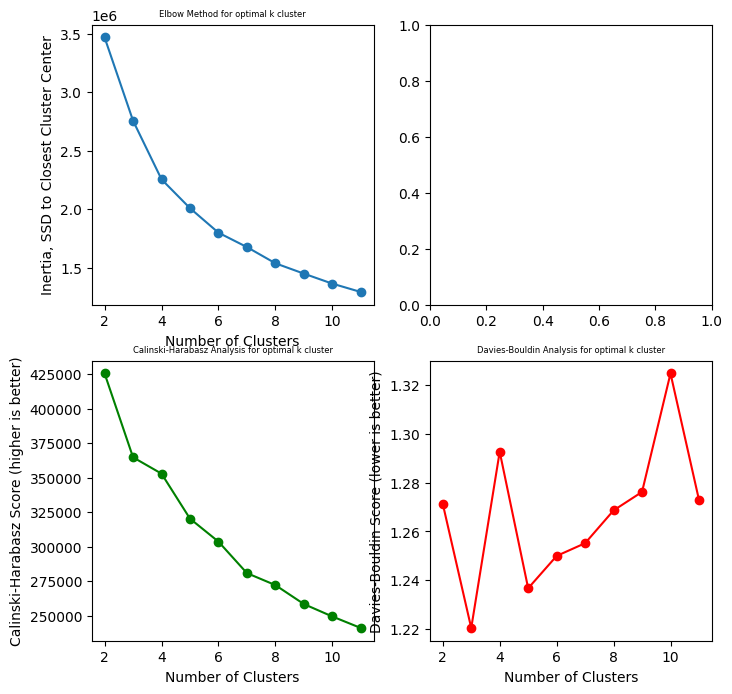

In [16]:
fig, axes = plt.subplots(2,2, figsize=(8, 8))
# set font size for all subplots and no overlap
plt.rcParams.update({'font.size': 5})


# Elbow Method Plot
axes[0,0].plot(results_df['n_clusters'], results_df['inertia'], marker='o')
axes[0,0].set_xlabel('Number of Clusters')
axes[0,0].set_ylabel('Inertia, SSD to Closest Cluster Center')
axes[0,0].set_title('Elbow Method for optimal k cluster')
# "Inertia is the sum of squared distances to the closest cluster center (centroid). 
# As the number of clusters increases, inertia decreases because data points are closer to their assigned centroids. 
# The 'elbow' point indicates an optimal number of clusters where adding more clusters yields diminishing returns in reducing inertia.", fontsize=5)

"""# Silhouette Score Plot
axes[0,1].plot(results_df['n_clusters'], results_df['silhouette_score'], marker='o', color='orange')
axes[0,1].set_xlabel('Number of Clusters')
axes[0,1].set_ylabel('Silhouette Score (how well separated clusters are)')
axes[0,1].set_title('Silhoutte Analysis for optimal k cluster')
# "The Silhouette Score measures how similar an object is to its own cluster compared to other clusters. 
# A higher score indicates better-defined clusters. The plot helps identify the optimal number of clusters where the silhouette score is maximized."
"""

# Calinski-Harabasz Score Plot
axes[1,0].plot(results_df['n_clusters'], results_df['Calinski-Harabasz'], marker='o', color='green')
axes[1,0].set_xlabel('Number of Clusters')
axes[1,0].set_ylabel('Calinski-Harabasz Score (higher is better)')
axes[1,0].set_title('Calinski-Harabasz Analysis for optimal k cluster')
# The Calinski-Harabasz Score evaluates cluster validity by measuring the ratio of between-cluster variance to within-cluster variance. 
# A higher score indicates better-defined clusters. The plot helps identify the optimal number of clusters where this score is maximized."

# Davies-Bouldin Score Plot
axes[1,1].plot(results_df['n_clusters'], results_df['Davies-Bouldin'], marker='o', color='red')
axes[1,1].set_xlabel('Number of Clusters')
axes[1,1].set_ylabel('Davies-Bouldin Score (lower is better)')
axes[1,1].set_title('Davies-Bouldin Analysis for optimal k cluster')
# The Davies-Bouldin Score assesses cluster quality by measuring the average similarity ratio of each cluster with its most similar cluster. 
# A lower score indicates better-defined clusters. The plot helps identify the optimal number of clusters where this score is minimized.

Either k = 2 or k = 5 seems to be optimal based on the 4 metrics below.

Though we can check silhouette score for k = 2 and k = 5, to ensure optimal k,

it is too computationally expensive. It could take 1-2 hours due to our large data set. 

Hence, elbow method is sufficient!

In [17]:
# set cluster = 5

kmeans = KMeans(n_clusters=5, random_state=42) 
labels = kmeans.fit_predict(train_processed)


train['cluster'] = labels
train


,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,cluster
0,male,36,189.0,82.0,26.0,101.0,41.0,150.0,0
1,female,64,163.0,60.0,8.0,85.0,39.7,34.0,3
2,female,51,161.0,64.0,7.0,84.0,39.8,29.0,3
3,male,20,192.0,90.0,25.0,105.0,40.7,140.0,0
4,female,38,166.0,61.0,25.0,102.0,40.6,146.0,4
...,...,...,...,...,...,...,...,...,...
749995,male,28,193.0,97.0,30.0,114.0,40.9,230.0,0
749996,female,64,165.0,63.0,18.0,92.0,40.5,96.0,1
749997,male,60,162.0,67.0,29.0,113.0,40.9,221.0,4
749998,male,45,182.0,91.0,17.0,102.0,40.3,109.0,0


# Visualize results!
- Visualize distribution of cluster (balanced?)
- Visualize summary statistics of each cluster
- Visualize distribution of target variable 'Calories' in each cluster
- Visualize boxplot of each feature 
- 2D viz using PCA

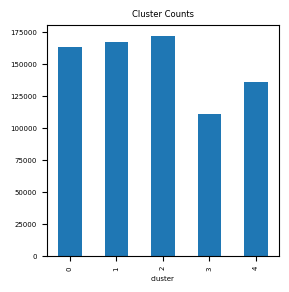

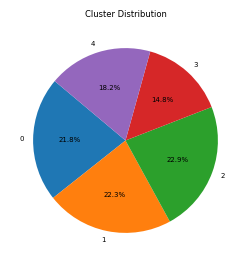

In [18]:
# check if cluster counts are balanced
plt.figure(figsize=(3,3))
train['cluster'].value_counts().sort_index().plot(kind='bar', title='Cluster Counts')

# pie chart
cluster_counts = train['cluster'].value_counts().sort_index()
plt.figure(figsize=(3,3))
plt.pie(cluster_counts, labels=cluster_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Cluster Distribution')
plt.show()

In [19]:
train['Sex'] = train['Sex'].map({'male': 1, 'female': 0})
train


,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,cluster
0,1,36,189.0,82.0,26.0,101.0,41.0,150.0,0
1,0,64,163.0,60.0,8.0,85.0,39.7,34.0,3
2,0,51,161.0,64.0,7.0,84.0,39.8,29.0,3
3,1,20,192.0,90.0,25.0,105.0,40.7,140.0,0
4,0,38,166.0,61.0,25.0,102.0,40.6,146.0,4
...,...,...,...,...,...,...,...,...,...
749995,1,28,193.0,97.0,30.0,114.0,40.9,230.0,0
749996,0,64,165.0,63.0,18.0,92.0,40.5,96.0,1
749997,1,60,162.0,67.0,29.0,113.0,40.9,221.0,4
749998,1,45,182.0,91.0,17.0,102.0,40.3,109.0,0


In [20]:
train

,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,cluster
0,1,36,189.0,82.0,26.0,101.0,41.0,150.0,0
1,0,64,163.0,60.0,8.0,85.0,39.7,34.0,3
2,0,51,161.0,64.0,7.0,84.0,39.8,29.0,3
3,1,20,192.0,90.0,25.0,105.0,40.7,140.0,0
4,0,38,166.0,61.0,25.0,102.0,40.6,146.0,4
...,...,...,...,...,...,...,...,...,...
749995,1,28,193.0,97.0,30.0,114.0,40.9,230.0,0
749996,0,64,165.0,63.0,18.0,92.0,40.5,96.0,1
749997,1,60,162.0,67.0,29.0,113.0,40.9,221.0,4
749998,1,45,182.0,91.0,17.0,102.0,40.3,109.0,0


Text(0.5, 36.58159722222221, 'Features')

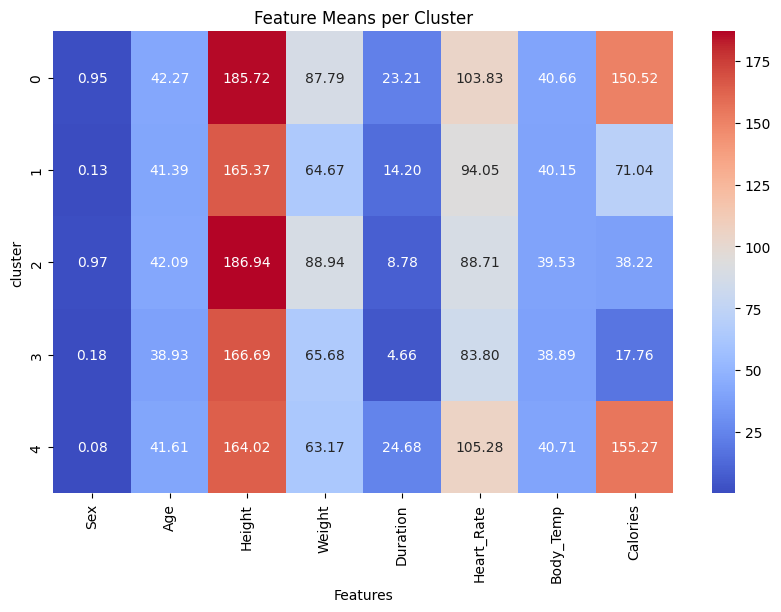

In [21]:
# Heatmap of feature means per cluster
cluster_means = train.groupby('cluster').mean()
plt.figure(figsize=(10, 6))
# set font size
plt.rcParams.update({'font.size': 10})
sns.heatmap(cluster_means, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Feature Means per Cluster')
plt.xlabel('Features')

# feauture correlation heat map : -1 to 1
# cluster feature heatmap : shows mean value of each feature in each cluster

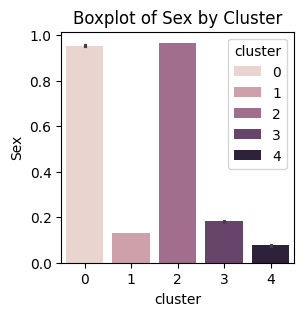

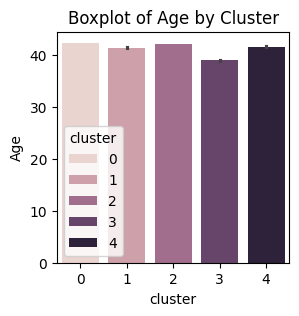

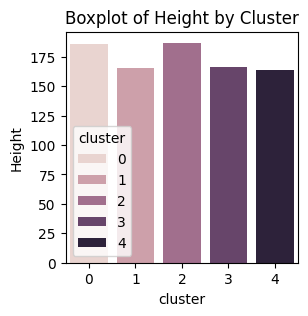

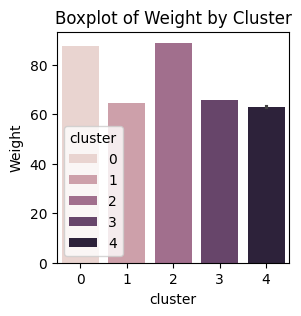

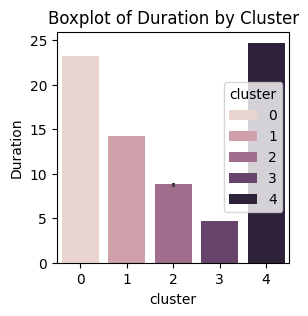

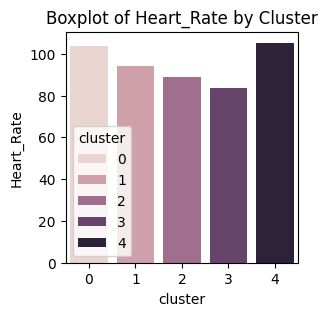

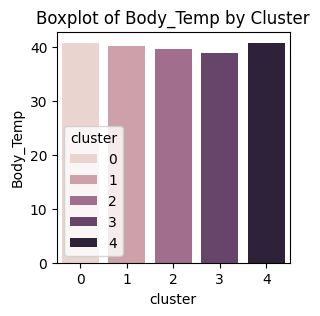

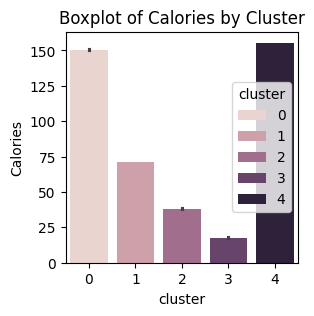

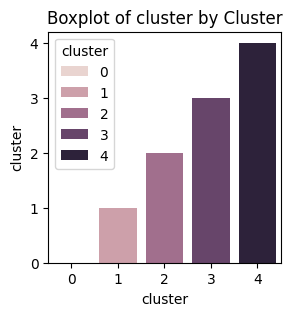

In [22]:
for cols in train.columns:
    plt.figure(figsize=(3,3))
    sns.barplot(x='cluster', y=cols, hue = 'cluster', data=train)
    plt.title(f'Boxplot of {cols} by Cluster')
    plt.show()

In [ ]:
from scipy.stats import f_oneway

# Example: test if 'Calories' differs across 5 clusters
groups = [train[train['cluster']==i]['Age'] for i in range(5)]
f_stat, p_val = f_oneway(*groups)

print(f"ANOVA result for Calories:")
print(f"F-statistic = {f_stat:.2f}, p-value = {p_val:.4f}")
print("A low p-value (< 0.05) indicates that there are significant differences in Calories across the clusters.")

# But anova is based on assumption of normal distrbution within each group.

ANOVA result for Calories:
F-statistic = 972.77, p-value = 0.0000
A low p-value (< 0.05) indicates that there are significant differences in Calories across the clusters.


Visualizing clusters with PCA

In [ ]:
from sklearn.decomposition import PCA

n_components = [2,3,4]
for n in n_components:
    pca = PCA(n_components=n)
    train_pca = pca.fit_transform(train.drop(columns=['cluster']))
    explained_variance = pca.explained_variance_ratio_.sum()
    print(f'Explained variance with {n} components: {explained_variance:.2f}')
    print(f"PCA Components: {pca.components_}")
# pca = PCA(n_components=2)
# train_pca = pca.fit_transform(train.drop(columns=['cluster']))

# PC1 : linear combinations of original features, with different weights (loadings) attached to each feature (feature space where variance is largest)
# PC2 : orthogonal to PC1, captures second highest variance direction
# Explained variance ratio : proportion of total variance explained by each principal component


Explained variance with 2 components: 0.95
PCA Components: [[ 9.60675638e-05  3.57515475e-02 -7.99125611e-04  3.55600393e-03
   1.26245286e-01  1.35533860e-01  1.01941756e-02  9.81986412e-01]
 [ 2.10755618e-02  1.03089657e-01  6.68756902e-01  7.35639799e-01
  -1.91439749e-02 -1.24117740e-02 -1.80617870e-03 -1.68199066e-03]]
Explained variance with 3 components: 0.99
PCA Components: [[ 9.60675638e-05  3.57515475e-02 -7.99125611e-04  3.55600393e-03
   1.26245286e-01  1.35533860e-01  1.01941756e-02  9.81986412e-01]
 [ 2.10755618e-02  1.03089657e-01  6.68756902e-01  7.35639799e-01
  -1.91439749e-02 -1.24117740e-02 -1.80617870e-03 -1.68199066e-03]
 [-3.13009317e-03  9.87980604e-01 -9.90379400e-02 -5.15347509e-02
  -7.02823660e-02 -7.87605895e-02 -4.93339293e-03 -1.59061109e-02]]
Explained variance with 4 components: 1.00
PCA Components: [[ 9.60675638e-05  3.57515475e-02 -7.99125611e-04  3.55600393e-03
   1.26245286e-01  1.35533860e-01  1.01941756e-02  9.81986412e-01]
 [ 2.10755618e-02  1.03

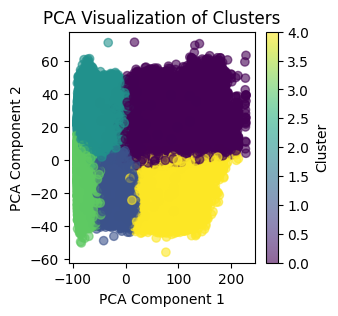

In [41]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
train_pca = pca.fit_transform(train.drop(columns=['cluster']))

plt.figure(figsize=(3, 3))
plt.scatter(train_pca[:, 0], train_pca[:, 1], c=train['cluster'], cmap='viridis', alpha=0.6)
plt.colorbar(label='Cluster')
plt.title('PCA Visualization of Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()  

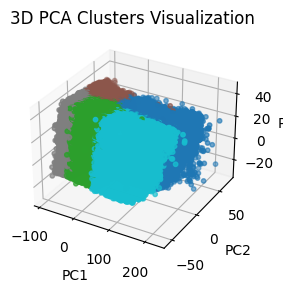

In [42]:
from mpl_toolkits.mplot3d import Axes3D  # needed for 3D plotting


pca = PCA(n_components=3)
train_pca = pca.fit_transform(train.drop(columns=['cluster']))

fig = plt.figure(figsize=(3,3))
ax = fig.add_subplot(111, projection='3d')


# Scatter points
ax.scatter(
    train_pca[:, 0], 
    train_pca[:, 1], 
    train_pca[:, 2], 
    c=train['cluster'],  # color by cluster
    cmap='tab10', 
    s=10
)

# Labels
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('3D PCA Clusters Visualization')

plt.show()

In [54]:
# Each row = feature, each column = PC
loadings = pd.DataFrame(
    pca.components_.T,
    columns=['PC1', 'PC2', 'PC3'],
    index=features.columns
)

# Absolute values show magnitude of contribution
loadings_abs = loadings
print(loadings_abs)


                 PC1       PC2       PC3
Sex         0.000096  0.021076 -0.003130
Age         0.035752  0.103090  0.987981
Height     -0.000799  0.668757 -0.099038
Weight      0.003556  0.735640 -0.051535
Duration    0.126245 -0.019144 -0.070282
Heart_Rate  0.135534 -0.012412 -0.078761
Body_Temp   0.010194 -0.001806 -0.004933
Calories    0.981986 -0.001682 -0.015906


In [53]:
for pc in ['PC1', 'PC2', 'PC3']:
    print(f"\nTop 3 features for {pc}:")
    print(loadings_abs[pc].sort_values(ascending=False).head(3))



Top 3 features for PC1:
Calories      0.981986
Heart_Rate    0.135534
Duration      0.126245
Name: PC1, dtype: float64

Top 3 features for PC2:
Weight    0.735640
Height    0.668757
Age       0.103090
Name: PC2, dtype: float64

Top 3 features for PC3:
Age          0.987981
Sex         -0.003130
Body_Temp   -0.004933
Name: PC3, dtype: float64


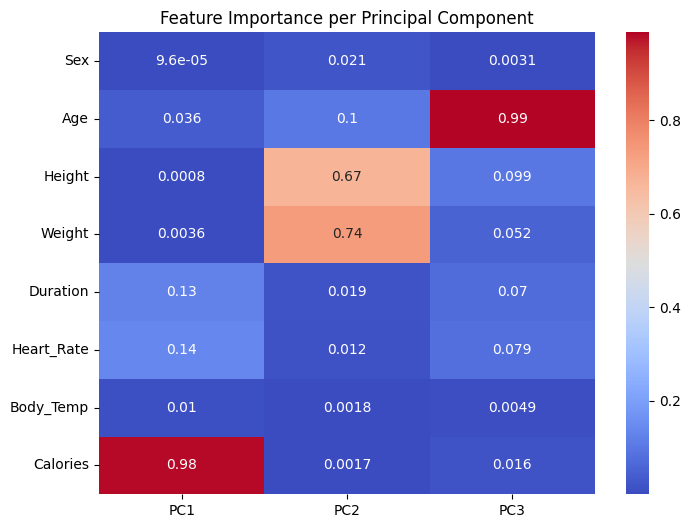

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.heatmap(loadings_abs, annot=True, cmap='coolwarm')
plt.title('Feature Importance per Principal Component')
plt.show()


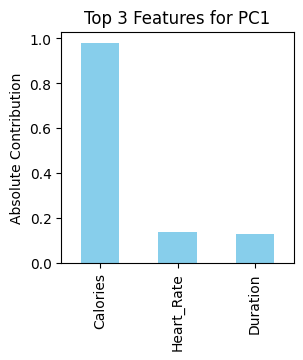

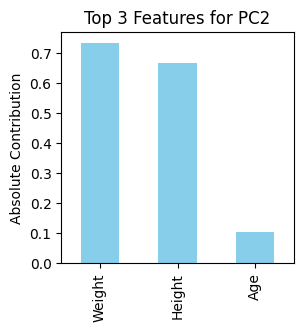

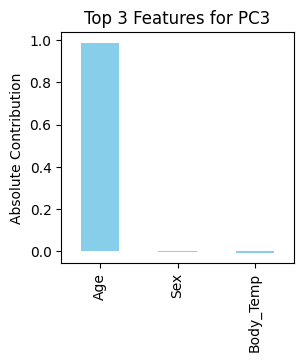

In [61]:
import matplotlib.pyplot as plt

pc = ['PC1', 'PC2', 'PC3']

for i in range(3):
    plt.figure(figsize=(3,3))
    top_features = loadings_abs[pc[i]].sort_values(ascending=False).head(3)
    top_features.plot(kind='bar', color='skyblue', title=f'Top 3 Features for {pc[i]}')
    plt.ylabel('Absolute Contribution')
    plt.show()


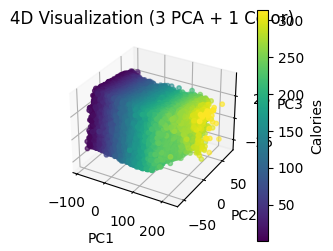

In [43]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# PCA to 3D
features = train.drop(columns=['cluster'])
pca = PCA(n_components=3)
train_pca = pca.fit_transform(features)

# Example: use a 4th feature as color (e.g., Calories)
color_feature = train['Calories']

fig = plt.figure(figsize=(3,3))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    train_pca[:,0], train_pca[:,1], train_pca[:,2],
    c=color_feature, cmap='viridis', s=10
)

# Add colorbar
cbar = fig.colorbar(scatter)
cbar.set_label('Calories')

# Axis labels
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('4D Visualization (3 PCA + 1 Color)')
plt.show()
